In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

palette = {0: 'orange', 1: 'blue'}

## Exercise 1

In [2]:
x1 = pd.Series(name='x', data=[0, 1, 0, -1, 0])
y1 = pd.Series(name='y', data=[0, 0, -1, 0, 1])
t1 = pd.Series(name='t', data=["x1", "x2", "x3", "x4", "x5"])
c1 = pd.Series(name='class', data=[0, 0, 0, 1, 1])

data1 = pd.DataFrame([x1,y1,t1,c1]).T

In [3]:
def get_base_plot(df):
    p1=sns.scatterplot(x="x", y="y", data=df, hue="class", palette=palette)
    for line in range(0,df.shape[0]):
         p1.text(df.x[line]+0.1, df.y[line], df.t[line])
    return p1

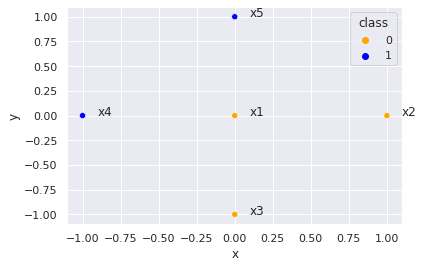

In [4]:
get_base_plot(data1)
plt.show()

In [5]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def threshold(x):
    return (x>=0)*1

def get_xs():
    x_grid, y_grid = np.mgrid[-1:1:20j, -1:1:20j]
    x_pos = x_grid.ravel()
    y_pos = y_grid.ravel()
    bias = np.ones(len(x_pos))
    return np.array([bias,x_pos,y_pos]).T

#### linear "classifier" (regression)

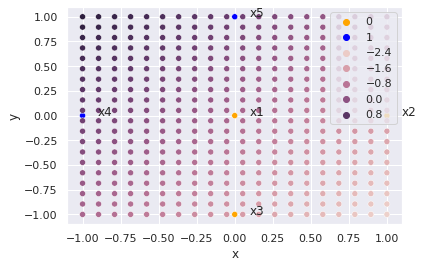

In [6]:
a0 = -0.5
a1 = -1
a2 = 1

a = np.array([a0,a1,a2])
xs = get_xs()
out = xs @ a

get_base_plot(data1)
sns.scatterplot(x=xs[:,1],y=xs[:,2], hue=out)
plt.legend(loc='upper right')

plt.show()

#### binary/threshold classifier

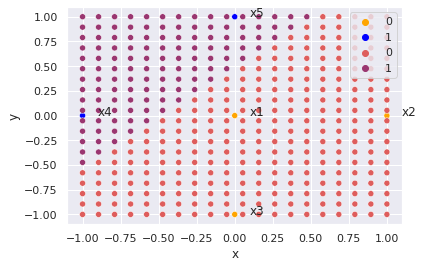

In [7]:
a0 = -0.5
a1 = -1
a2 = 1

a = np.array([a0,a1,a2])
xs = get_xs()
out = threshold(xs @ a)

get_base_plot(data1)
g = sns.scatterplot(x=xs[:,1],y=xs[:,2], hue=out, palette='flare')
plt.legend(loc='upper right')

plt.show()

#### naive logistic classifier

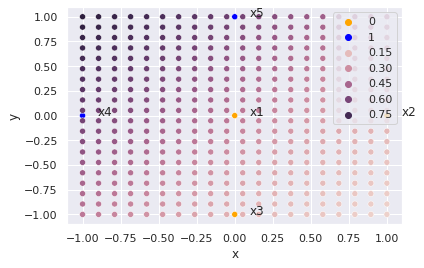

In [8]:
a0 = -0.5
a1 = -1
a2 = 1

a = np.array([a0,a1,a2])
xs = get_xs()
out = sigmoid(xs @ a)

get_base_plot(data1)
sns.scatterplot(x=xs[:,1],y=xs[:,2], hue=out)
plt.legend(loc='upper right')

plt.show()

#### improved logistic classifier

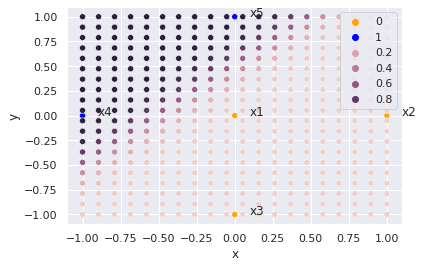

In [9]:
a0 = -5
a1 = -10
a2 = 10

a = np.array([a0,a1,a2])
xs = get_xs()
out = sigmoid(xs @ a)

get_base_plot(data1)
sns.scatterplot(x=xs[:,1],y=xs[:,2], hue=out)
plt.legend(loc='upper right')

plt.show()

## Exercise 2

In [10]:
x2 = pd.Series(name='x', data=[0, 1, 0, -1, 0])
y2 = pd.Series(name='y', data=[0, 0, -1, 0, 1])
t2 = pd.Series(name='t', data=["x1", "x2", "x3", "x4", "x5"])
c2 = pd.Series(name='class', data=[0, 1, 1, 0, 0])

data2 = pd.DataFrame([x2,y2,t2,c2]).T

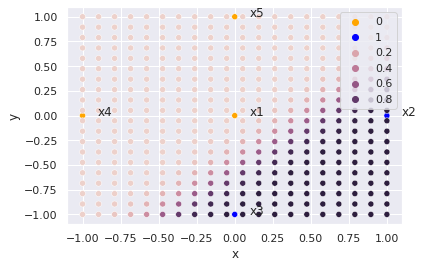

In [11]:
b0 = -5
b1 = 10
b2 = -10

b = np.array([b0,b1,b2])
xs = get_xs()
out = sigmoid(xs @ b)

get_base_plot(data2)
sns.scatterplot(x=xs[:,1],y=xs[:,2], hue=out)

plt.show()

## Exercise 3

In [12]:
x3 = pd.Series(name='x', data=[0, 1, 0, -1, 0])
y3 = pd.Series(name='y', data=[0, 0, -1, 0, 1])
t3 = pd.Series(name='t', data=["x1", "x2", "x3", "x4", "x5"])
c3 = pd.Series(name='class', data=[1, 0, 0, 0, 0])

data3 = pd.DataFrame([x3,y3,t3,c3]).T

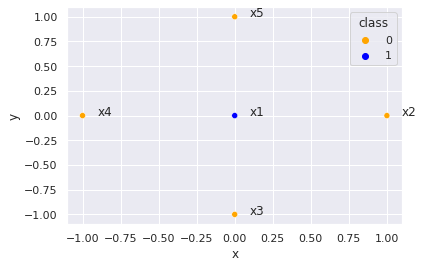

In [13]:
get_base_plot(data3)
plt.show()

In [14]:
xs = get_xs()
z1 = sigmoid(xs @ a)
z2 = sigmoid(xs @ b)
bias = np.ones(len(z1))
z = np.array([bias,z1,z2]).T

#### Vizualization of the transformation happening at the hidden layer

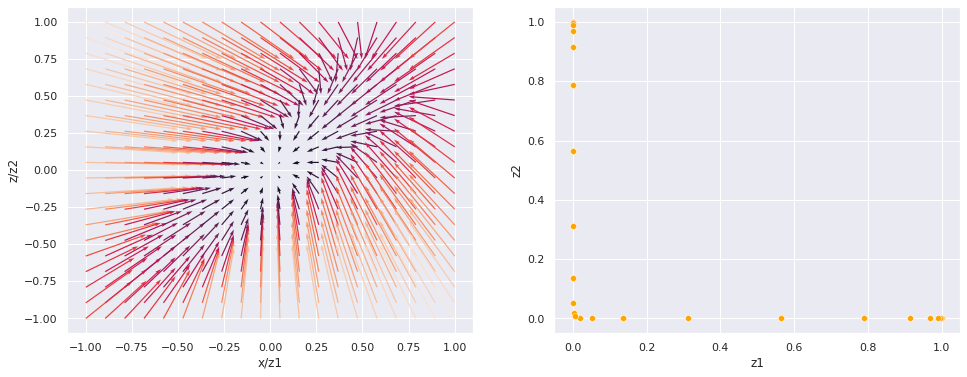

In [15]:
dx = z1 - xs[:,1]
dy = z2 - xs[:,2]
lengths = [np.linalg.norm((i,j)) for i,j in zip(dx,dy)]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.quiver(xs[:,1],xs[:,2],dx,dy,lengths, angles='xy', scale_units='xy', scale=4)
ax1.set_xlabel('x/z1')
ax1.set_ylabel('z/z2')
sns.scatterplot(x=z1,y=z2,ax=ax2, color='orange')
ax2.set_xlabel('z1')
ax2.set_ylabel('z2')
plt.show()

#### Vizualization of the classification in z1/z2 space

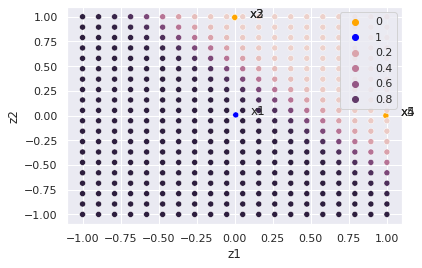

In [16]:
g0 = 5
g1 = -10
g2 = -10

g = np.array([g0,g1,g2])
xs = get_xs()
out = sigmoid(xs @ g)

data3['z1'] = sigmoid((a0 + data3.x * a1 + data3.y * a2).to_numpy(dtype=float))
data3['z2'] = sigmoid((b0 + data3.x * b1 + data3.y * b2).to_numpy(dtype=float))

palette = {0: 'orange', 1: 'blue'}
p1=sns.scatterplot(x="z1", y="z2", data=data3, hue="class", palette=palette)
for line in range(0,data3.shape[0]):
     p1.text(data3.z1[line]+0.1, data3.z2[line], data3.t[line])

sns.scatterplot(x=xs[:,1],y=xs[:,2], hue=out)

plt.show()

#### Vizualization of the classification in x/y space

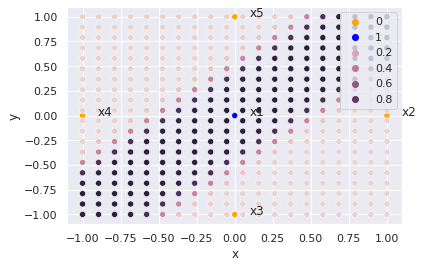

In [17]:
xs = get_xs()
zs = np.array([np.ones(len(z1)),z1,z2]).T
out = sigmoid(zs @ g)

get_base_plot(data3)
sns.scatterplot(x=xs[:,1],y=xs[:,2], hue=out)
plt.show()